In [1]:
# Install required libraries and packages
# !pip install -r requirements.txt

  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached shap-0.45.0-cp310-cp310-win_amd64.whl (453 kB)
  Using cached matplotlib-3.8.4-cp310-cp310-win_amd64.whl (7.7 MB)
  Using cached scipy-1.13.0-cp310-cp310-win_amd64.whl (46.2 MB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl (10.6 MB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.59.1-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl (187 kB)
  Using cached fonttools-4.50.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires h5py>=2.9.0, which is not installed.
tensorflow 2.10.0 requires typing-extensions>=3.6.6, which is not installed.
tensorflow 2.10.0 requires wrapt>=1.11.0, which is not installed.
tensorflow-intel 2.12.0 requires h5py>=2.9.0, which is not installed.
tensorflow-intel 2.12.0 requires typing-extensions>=3.6.6, which is not installed.
tensorflow-intel 2.12.0 requires wrapt<1.15,>=1.11.0, which is not installed.
tensorboard 2.10.1 requires markdown>=2.6.8, which is not installed.
tensorboard 2.10.1 requires werkzeug>=1.0.1, which is not installed.
streamlit 1.22.0 requires importlib-metadata>=1.4, which is not installed.
streamlit 1.22.0 requires tenacity<9,>=8.0.0, which is not installed.
streamlit 1.22.0 requires toml, which is not installed.
streamlit 1.22.0 requires typing-extensions>=3.1

In [1]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# library for sampling 
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import shap
%matplotlib inline

c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("data.csv", delimiter=";") 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Number of duplicated:", len(df[df.duplicated()])) 

Number of duplicated: 12


In [4]:
# Print duplicated dataframe
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [5]:
 # Drop the duplicated rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [6]:
# Tidy up index after dropping rows
df = df.reset_index(drop=True)
print("Check duplicated rows after dropping rows  :", len(df[df.duplicated()])) 

Check duplicated rows after dropping rows  : 0


In [7]:
# Print information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [8]:
# Check categorical and numberical columns
for column_name in list(df.columns): # Loop
    print(column_name, df[column_name].dtype, df[column_name].unique()) # column_name datatype, unique column name values

age int64 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job object ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital object ['married' 'single' 'divorced' 'unknown']
education object ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default object ['no' 'unknown' 'yes']
housing object ['no' 'yes' 'unknown']
loan object ['no' 'yes' 'unknown']
contact object ['telephone' 'cellular']
month object ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week object ['mon' 'tue' 'wed' 'thu' 'fri']
duration int64 [ 261  149  226 ... 1246 1556 1868]
campaign int64 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 

In [9]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns) # categorical columns as object format
list_numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns) # numeric columns as numeric format
target_column = "y"
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

41176
21
11
10


In [10]:
# Check null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
# Remove the y target column to check dependent columns
list_categorical_columns.remove(target_column)

In [12]:
# Briefly describe the ratio
df[target_column].describe()

count     41176
unique        2
top          no
freq      36537
Name: y, dtype: object

In [13]:
# Check the number of response each
df[target_column].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

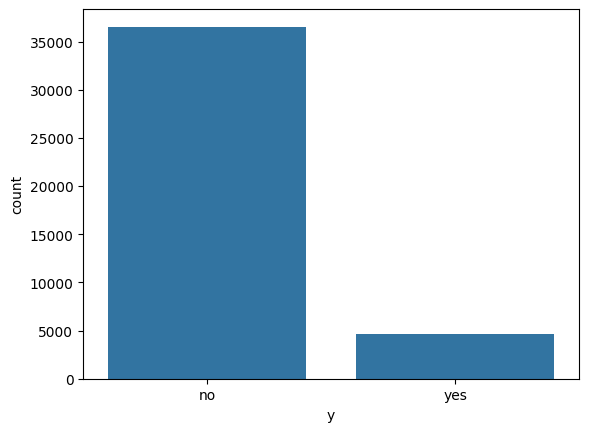

In [14]:
# Simply draw a viz with Seaborn
sns.countplot(x=target_column, data=df)

In [15]:
# Check if any column is not useful for the y target
df[list_categorical_columns].nunique().sort_values() 

contact         2
default         3
housing         3
loan            3
poutcome        3
marital         4
day_of_week     5
education       8
month          10
job            12
dtype: int64

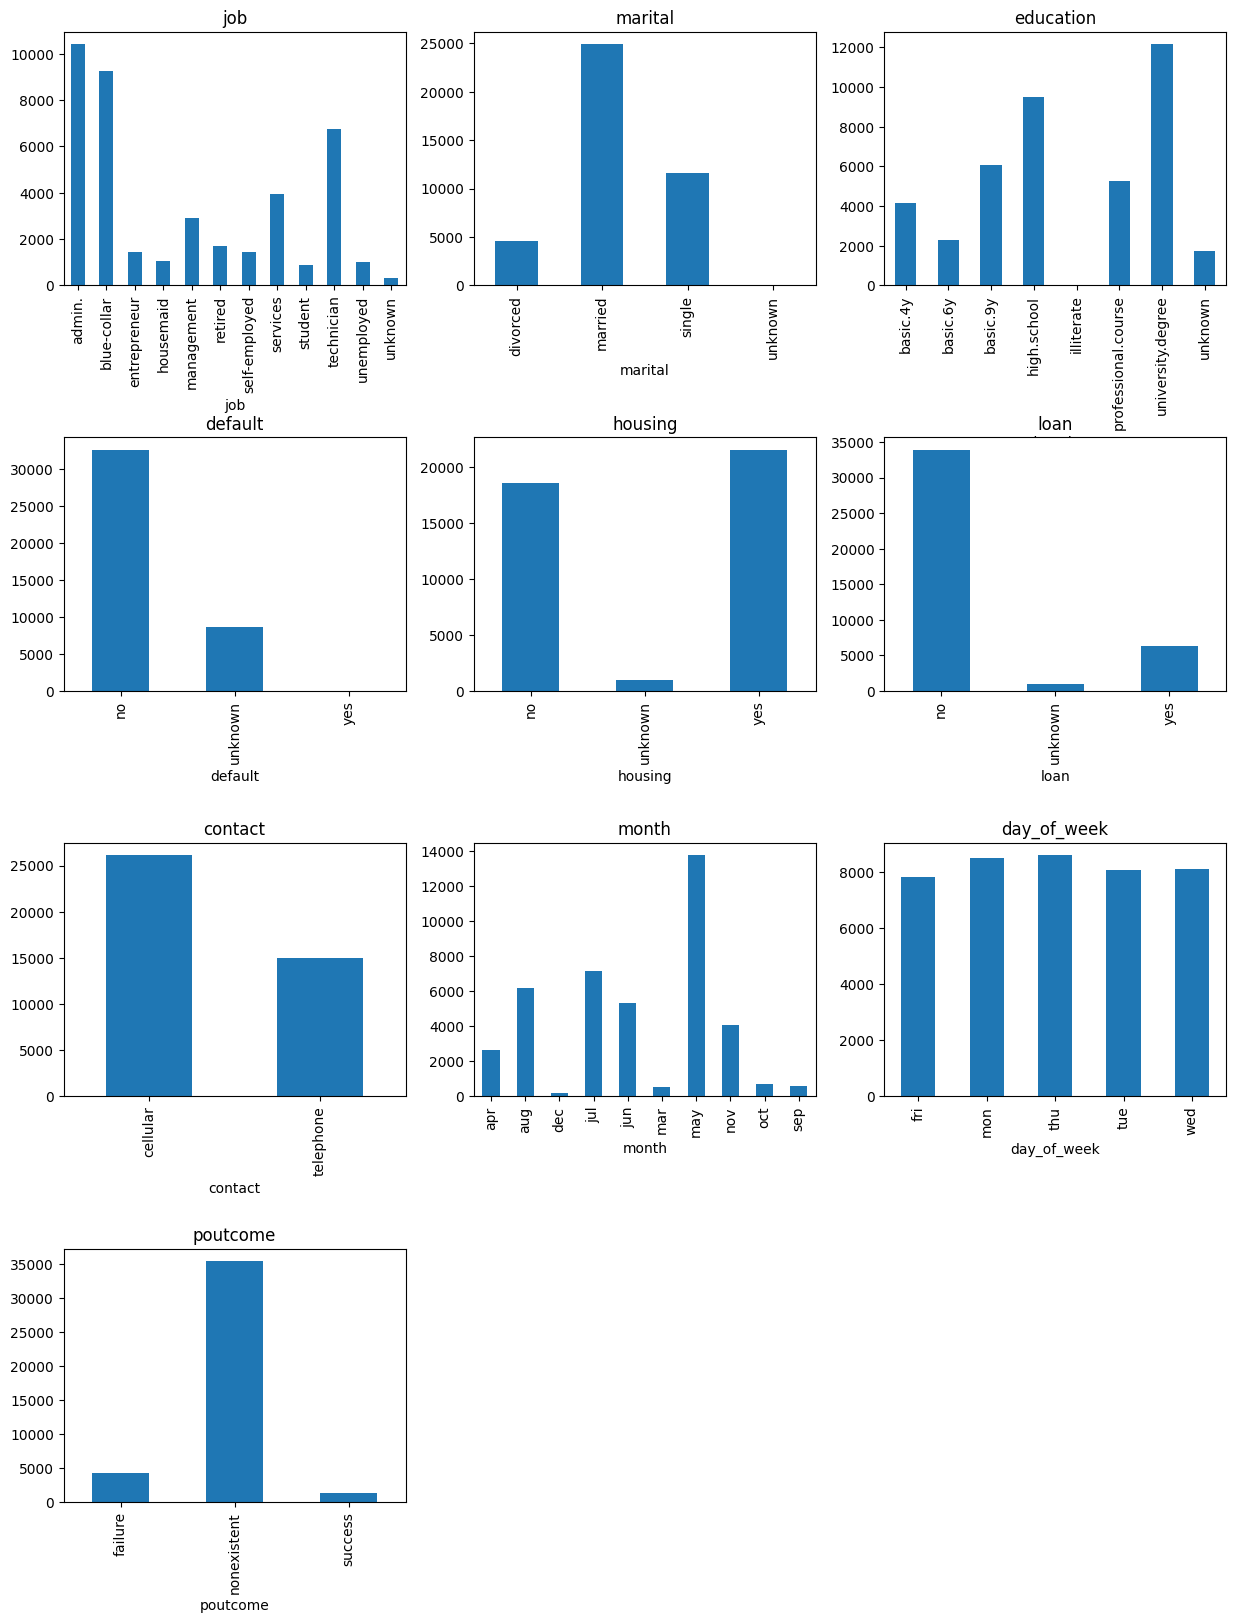

In [16]:
# Check cateogircla column ratio
plt.figure(figsize=(15,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(4,3,x)
    x = x+1
    df[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

In [17]:
print(list_categorical_columns)
list_categorical_columns[9]

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


'poutcome'

poutcome  failure  nonexistent  success
y                                      
no           3647        32411      479
yes           605         3140      894


<Axes: xlabel='y'>

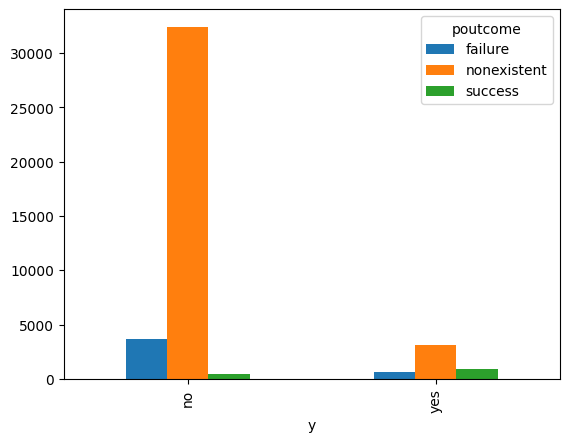

In [18]:
# categorical column과 dependent data(target column) Ratio
# No and Yes count ratio is not ideal for checking depdent data ratio
df_poutcome_dependent = pd.crosstab(df[target_column], df[list_categorical_columns[9]]) # poutcome
print(df_poutcome_dependent)
df_poutcome_dependent.plot(kind='bar')


In [19]:
pd.crosstab(df[target_column], df[list_categorical_columns[-1]], normalize="index")

poutcome,failure,nonexistent,success
y,,,
no,0.099817,0.887073,0.013110
yes,0.130416,0.676870,0.192714


<Axes: xlabel='y'>

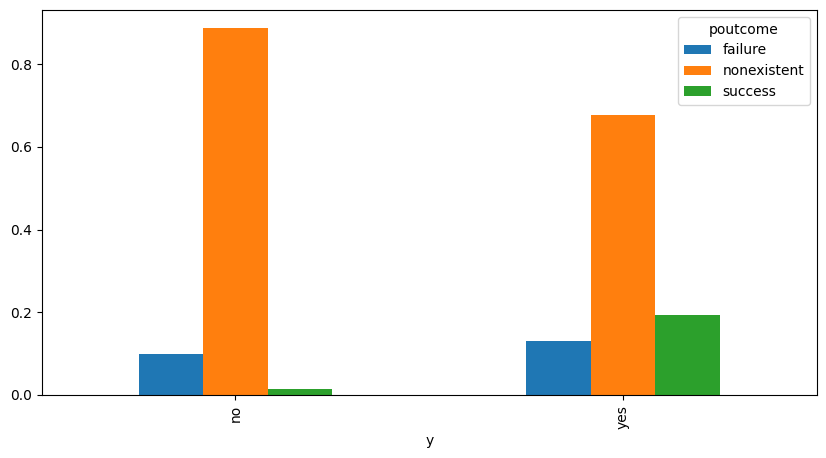

In [20]:
df_poutcome_dependent_ratio = pd.crosstab(df[target_column], df[list_categorical_columns[-1]], normalize="index") # Normalise the y counter, so we can see the ratio
df_poutcome_dependent_ratio.plot.bar(figsize=(10,5))


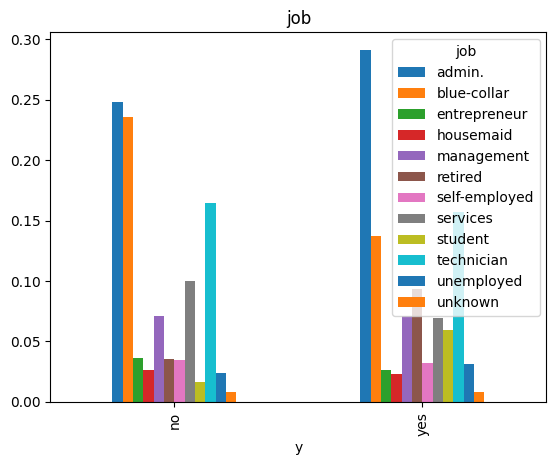

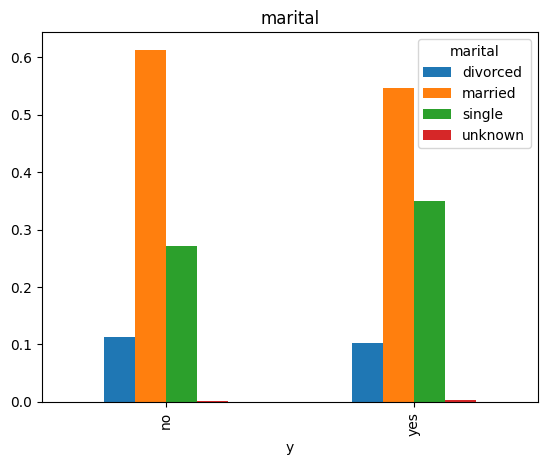

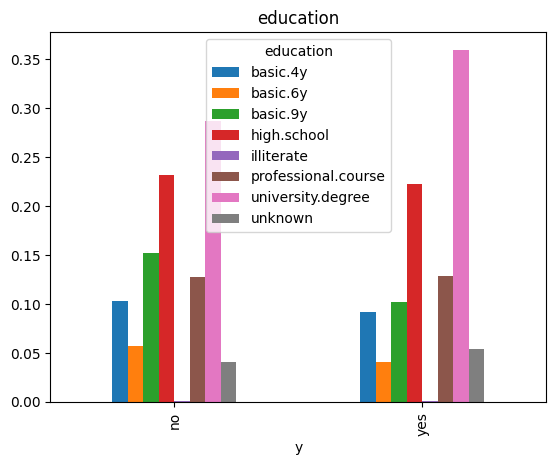

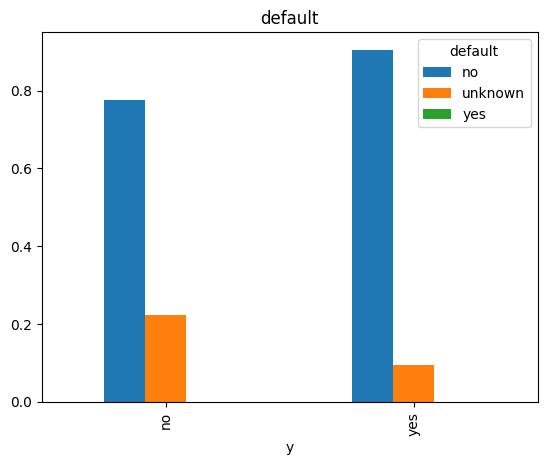

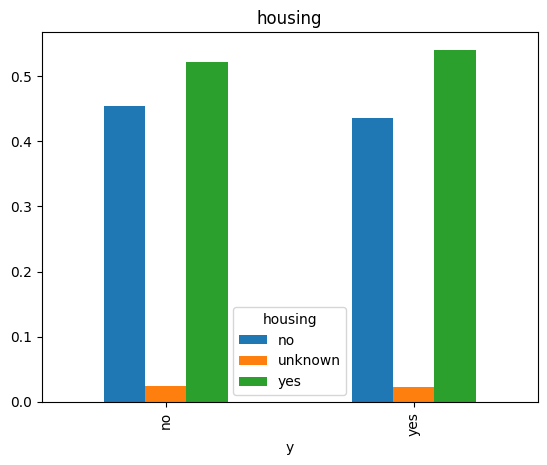

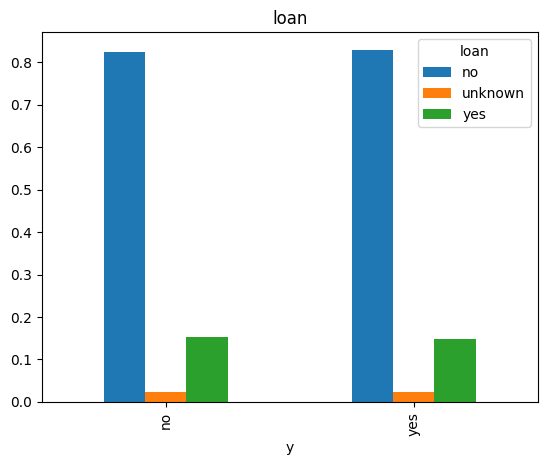

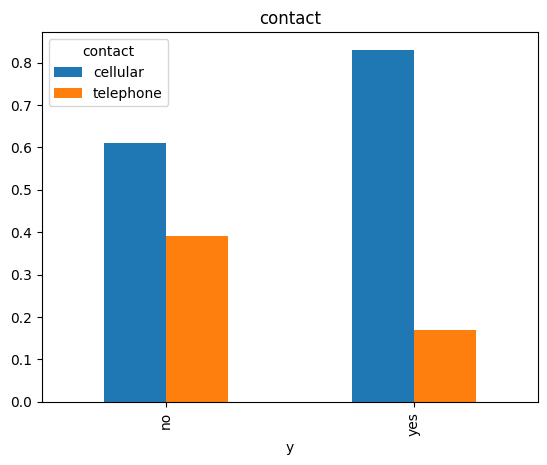

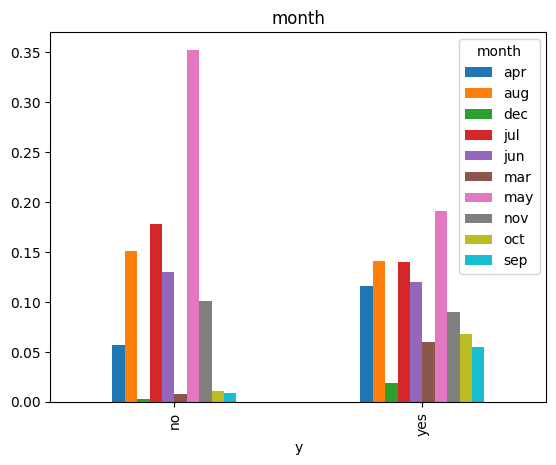

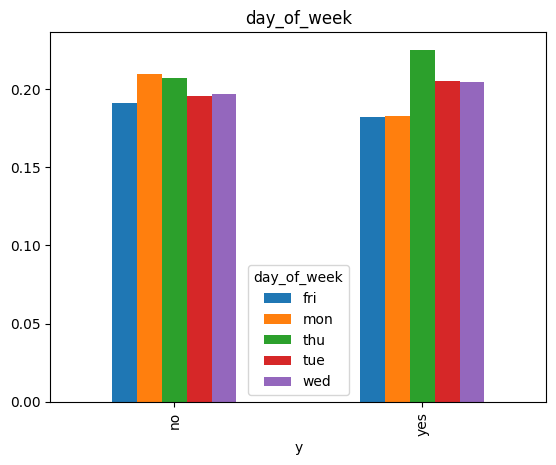

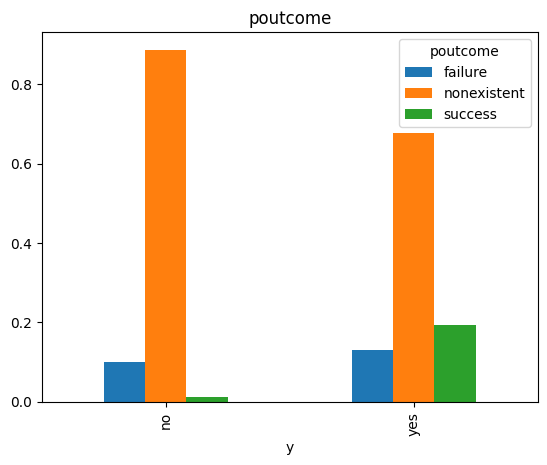

In [21]:
# Draw a ratio data plot
for column_name in list_categorical_columns: #each column_name
    pd.crosstab(df[target_column], df[column_name], normalize="index").plot.bar() #eadch column name and target variable crosstab and plot 
    plt.title(column_name)
plt.show()

In [22]:
# Chi Sqaure
list_meaningful_column_by_chi = []

for column_name in list_categorical_columns:
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_column], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  print(column_name, statistic, pvalue)

print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

job 961.7438037353177 3.2684116066165443e-199
marital 122.95931379226256 1.778422500461116e-26
education 192.8485047401879 3.746768377534744e-38
default 406.5560941574606 5.217540893727963e-89
housing 5.742152842222754 0.05663792749452546
loan 1.0992950447716308 0.5771532081176227
contact 862.0807365848323 1.7187406241263767e-189
month 3103.032672105299 0.0
day_of_week 26.054243692750852 3.085754965631736e-05
poutcome 4230.14342770359 0.0
all categorical columns :  10
selected columns by chi :  8 ['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']


In [24]:
# Check numerical columns if any columns are not important
df[list_numeric_columns].nunique().sort_values()

previous             8
emp.var.rate        10
nr.employed         11
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [25]:
df[list_numeric_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


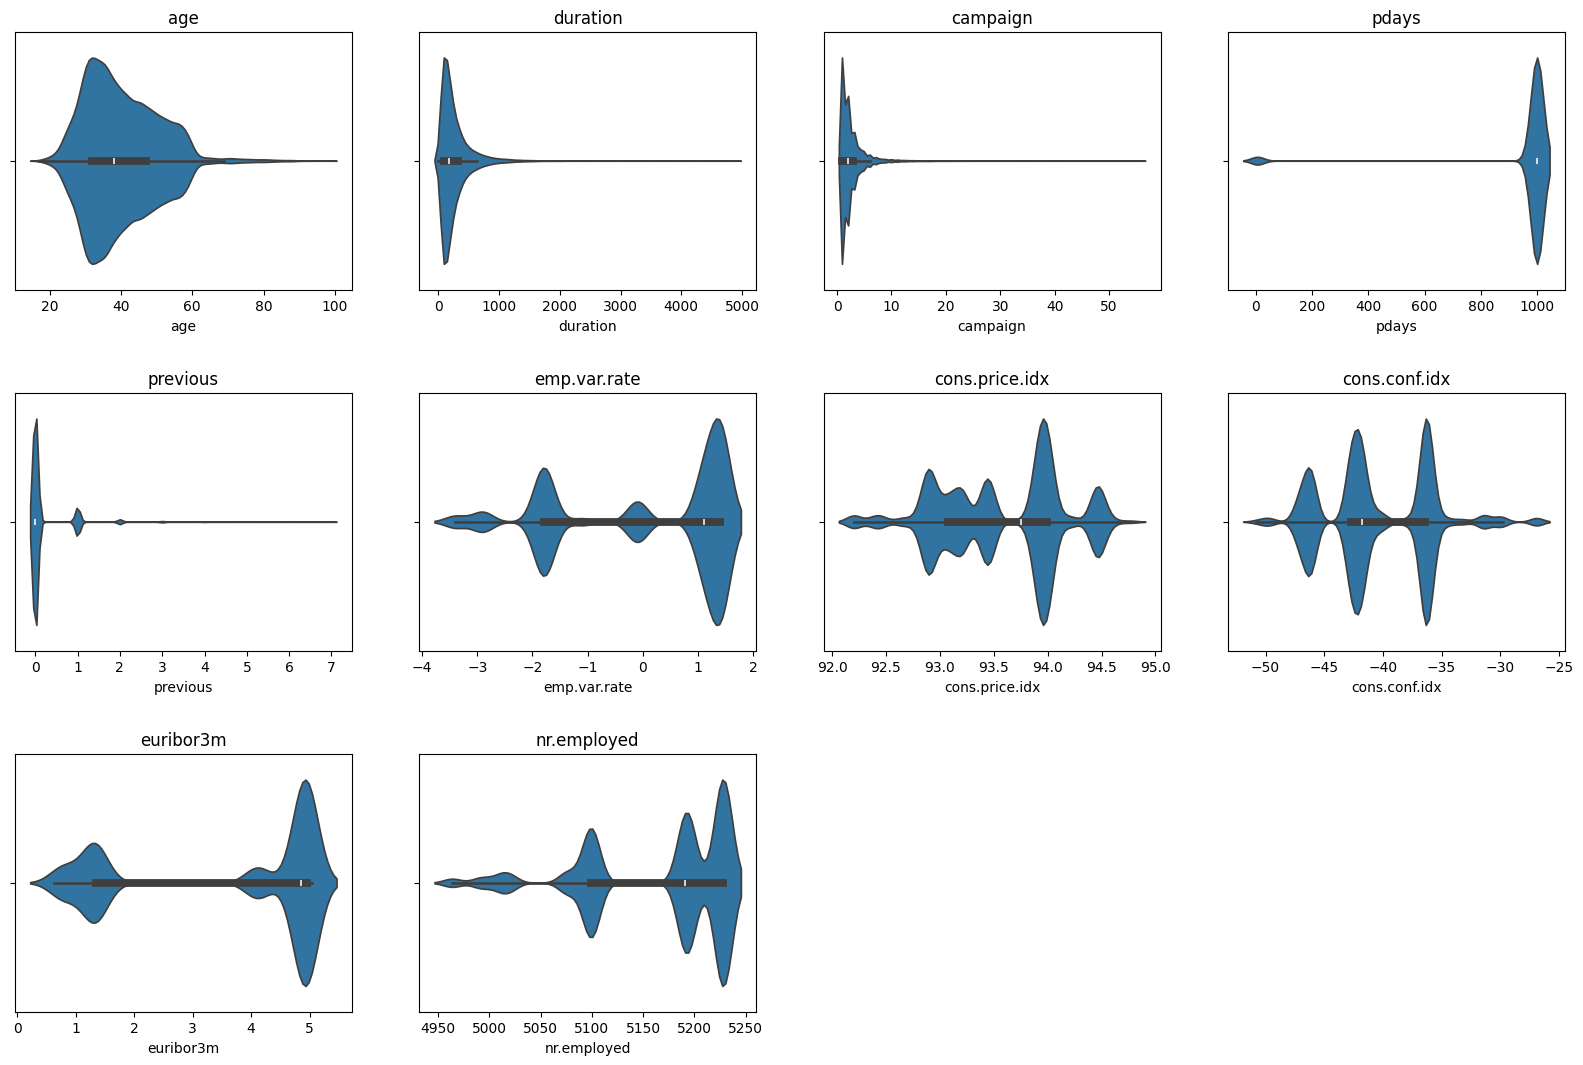

In [28]:
# numeric column ratio violin plot
plt.figure(figsize=(20,10))
x = 1

plt.subplots_adjust(top=0.99, bottom= 0.01, hspace = 0.4, wspace =0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,4,x)
    x = x +1
    sns.violinplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [29]:
for column_name in list_numeric_columns:
    print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]))



age skew :  0.7845316793906337 kur :  0.7908715485573286
duration skew :  3.2626886475171046 kur :  20.241167105999835
campaign skew :  4.76187058291751 kur :  36.96722235388976
pdays skew :  -4.921207099141221 kur :  22.21870880664178
previous skew :  3.8312559388497256 kur :  20.09957712427588
emp.var.rate skew :  -0.7240342146771608 kur :  -1.062714697365619
cons.price.idx skew :  -0.2308444969439891 kur :  -0.8298960161833482
cons.conf.idx skew :  0.3028649665515025 kur :  -0.3591991612497849
euribor3m skew :  -0.7091683770703301 kur :  -1.4067662115952242
nr.employed skew :  -1.0442790133772375 kur :  -0.0036849526898108387


<Axes: >

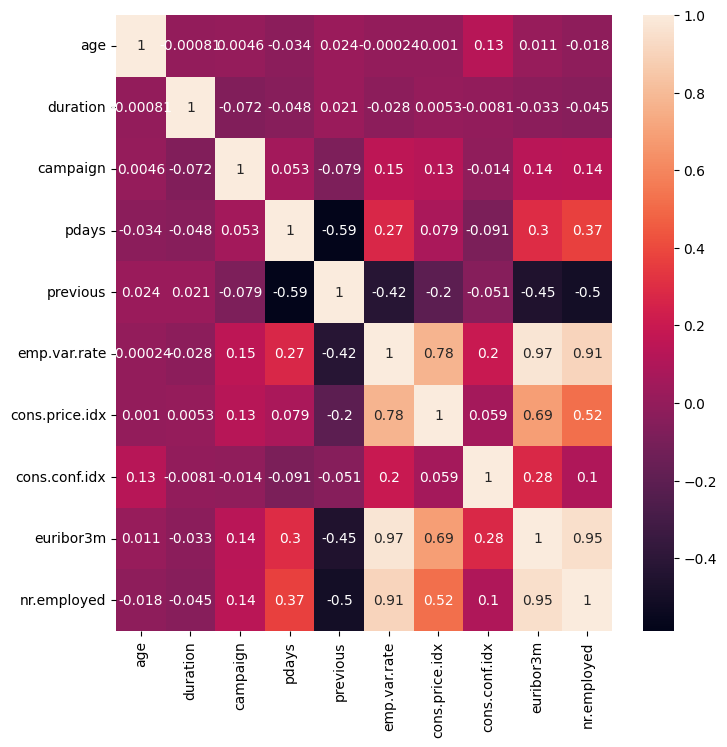

In [30]:
df_corr = df[list_numeric_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, annot=True)

In [31]:
# euribor3m and emp.var.rate correlation 0.97
# nr.employed and emp.var.rate correlation 0.91
# emp.var.rate and cons.price.idx correlation 0.78

index_corr_over_75 = np.where((abs(df_corr) >0.75) & (df_corr != 1))
index_corr_over_75

(array([5, 5, 5, 6, 8, 8, 9, 9], dtype=int64),
 array([6, 8, 9, 5, 5, 9, 5, 8], dtype=int64))

In [33]:
len_corr_over_75 = len(index_corr_over_75[0])
left_columns = df_corr.columns[index_corr_over_75[0]]
right_columns = df_corr.columns[index_corr_over_75[1]]
for index in range(len_corr_over_75):
    print(left_columns[index], "<->", right_columns[index])

emp.var.rate <-> cons.price.idx
emp.var.rate <-> euribor3m
emp.var.rate <-> nr.employed
cons.price.idx <-> emp.var.rate
euribor3m <-> emp.var.rate
euribor3m <-> nr.employed
nr.employed <-> emp.var.rate
nr.employed <-> euribor3m


In [35]:
# correlation => 0.9 - pvalue test
list_not_valid = []
for index in range(len_corr_over_75):
    statistic, pvalue = stats.pearsonr(df.loc[:,left_columns[index]], df.loc[:,right_columns[index]])
    print("%s<->%s : %f %f"%(left_columns[index],right_columns[index], statistic, pvalue))
    if (pvalue > 0.05):
        list_not_valid.append(column_name)

print("end")
print(len(list_not_valid),  "is not valid")

emp.var.rate<->cons.price.idx : 0.775293 0.000000
emp.var.rate<->euribor3m : 0.972244 0.000000
emp.var.rate<->nr.employed : 0.906949 0.000000
cons.price.idx<->emp.var.rate : 0.775293 0.000000
euribor3m<->emp.var.rate : 0.972244 0.000000
euribor3m<->nr.employed : 0.945146 0.000000
nr.employed<->emp.var.rate : 0.906949 0.000000
nr.employed<->euribor3m : 0.945146 0.000000
end
0 is not valid
